<a href="https://colab.research.google.com/github/OmGori-25/Electric-Vehicles-Analysis/blob/main/Electric_Vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ev_data = pd.read_csv('EV_data.csv')
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
ev_data = ev_data.dropna()

## EV Adoption Over Time

<ipython-input-6-1661d7415ebf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette = "viridis")


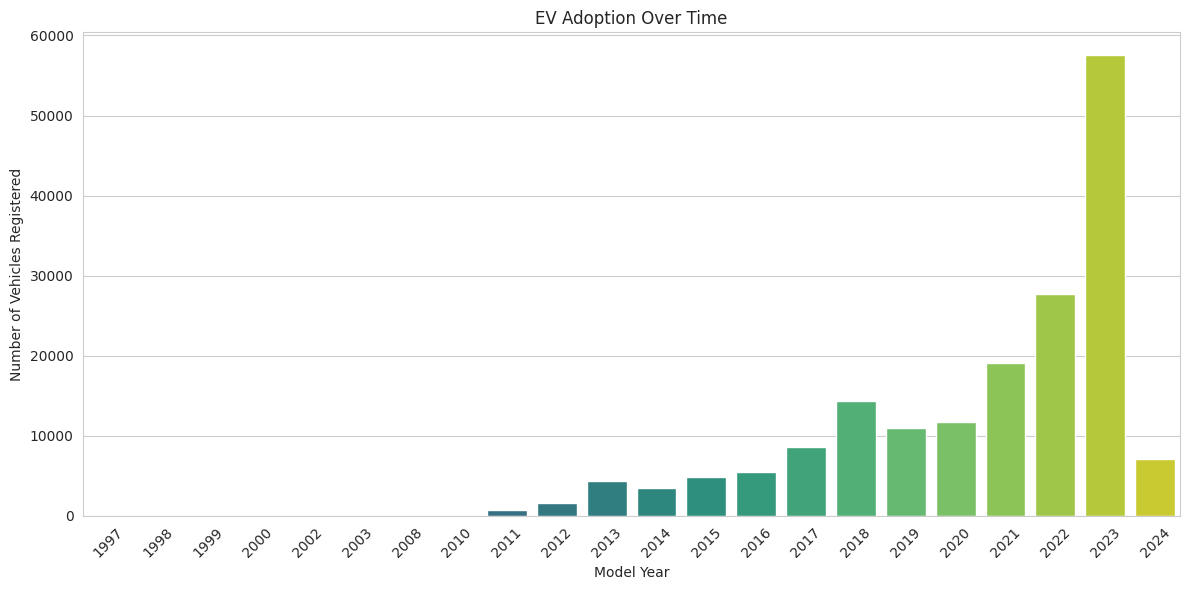

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
# ev_adoption_by_year
sns.barplot(x=ev_adoption_by_year.index,y=ev_adoption_by_year.values,palette = "viridis")
plt.title("EV Adoption Over Time")
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



From the above bar chart, it's clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar of 2023 being the highest on the graph.

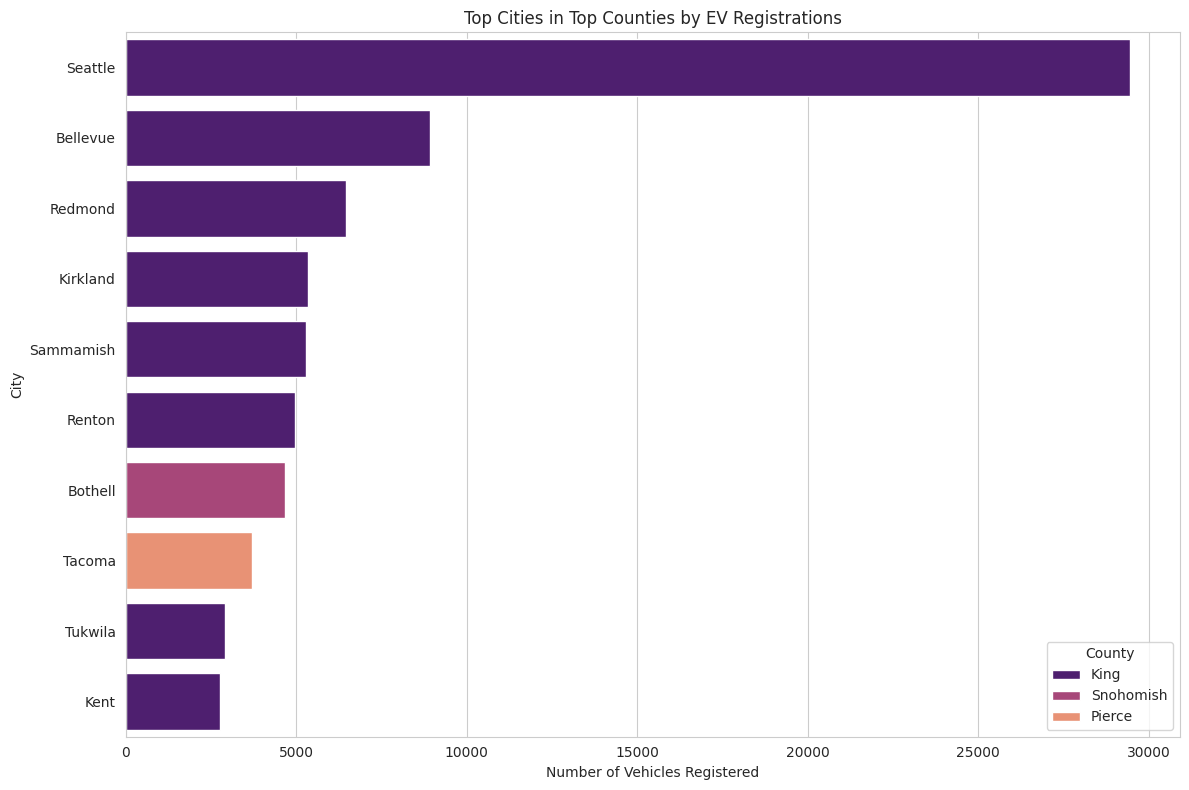

In [ ]:
ev_county_distribution = ev_data['County'].value_counts()
# ev_county_distribution
top_counties = ev_county_distribution.head(3).index

top_counties_data = ev_data[ev_data['County'].isin(top_counties)]
# top_counties_data

ev_city_distribution_top_counties = top_counties_data.groupby(['County' , 'City']).size().sort_values(ascending = False).reset_index(name = "Number of Vehicles")
ev_city_distribution_top_counties

top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x="Number of Vehicles" , y="City",hue="County",data=top_cities,palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title = 'County')
plt.tight_layout()
plt.show()

The above graph compares the number of elctric vehicles registered in various cities within three counties:King, Snohomish and Pierce.
The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county.
Seattle, which is King county has the highest number of EV registrations by a significant margin.
Tacoma and Tukwila, represnting Pierce County, have the fewest registrations.
Majority of cities are from King County which seems to dominate EV registrations among three counties.
Overall, the graph indicates EV adoption is not uniform across the cities and is more concentrated in King Couunty.

<ipython-input-8-b973b4685422>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values , y=ev_type_distribution.index ,palette='rocket')


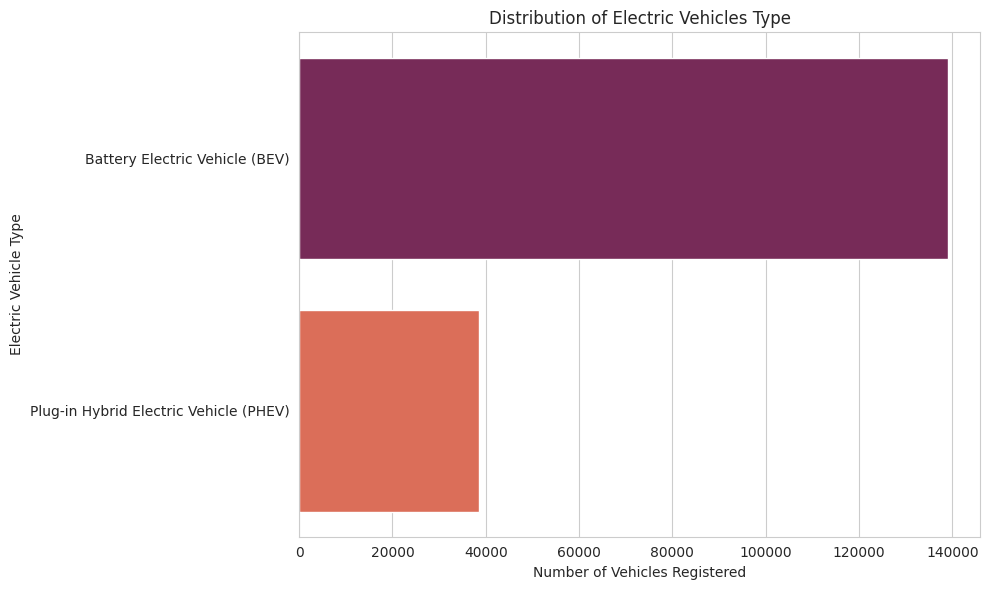

In [ ]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values , y=ev_type_distribution.index ,palette='rocket')
plt.title("Distribution of Electric Vehicles Type")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Electric Vehicle Type")
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more popular or preferred over PHEVs among the elctric vehicles registered in United States.

<ipython-input-9-97113d1d6289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')


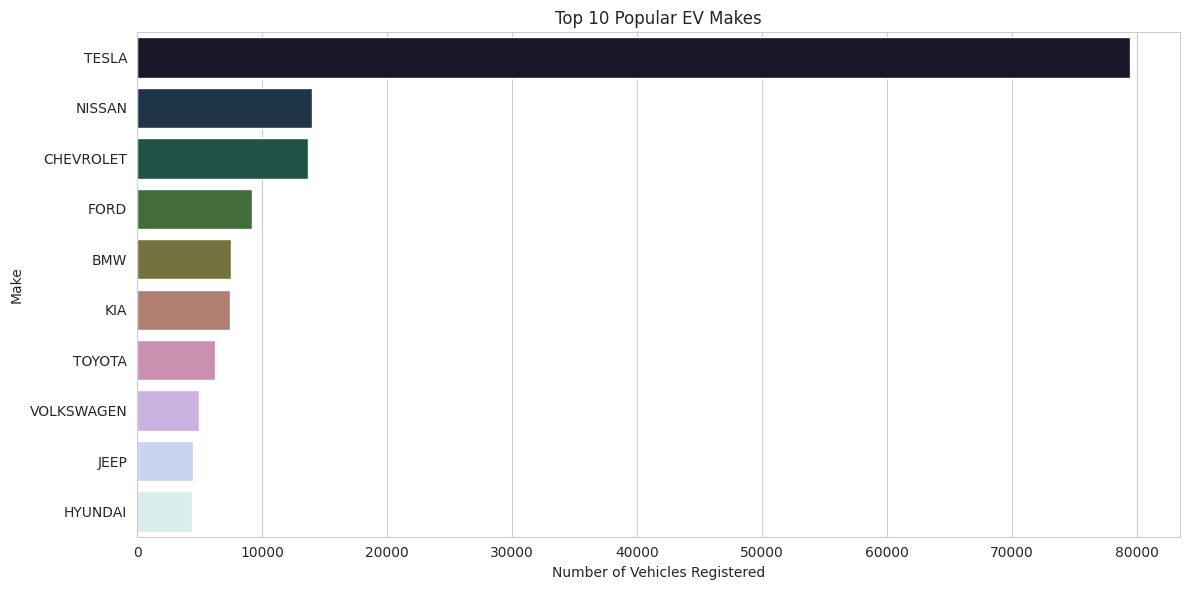

In [ ]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
plt.figure(figsize = (12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Make")
plt.tight_layout()
plt.show()

Tesla leads the number of vehicles registered.


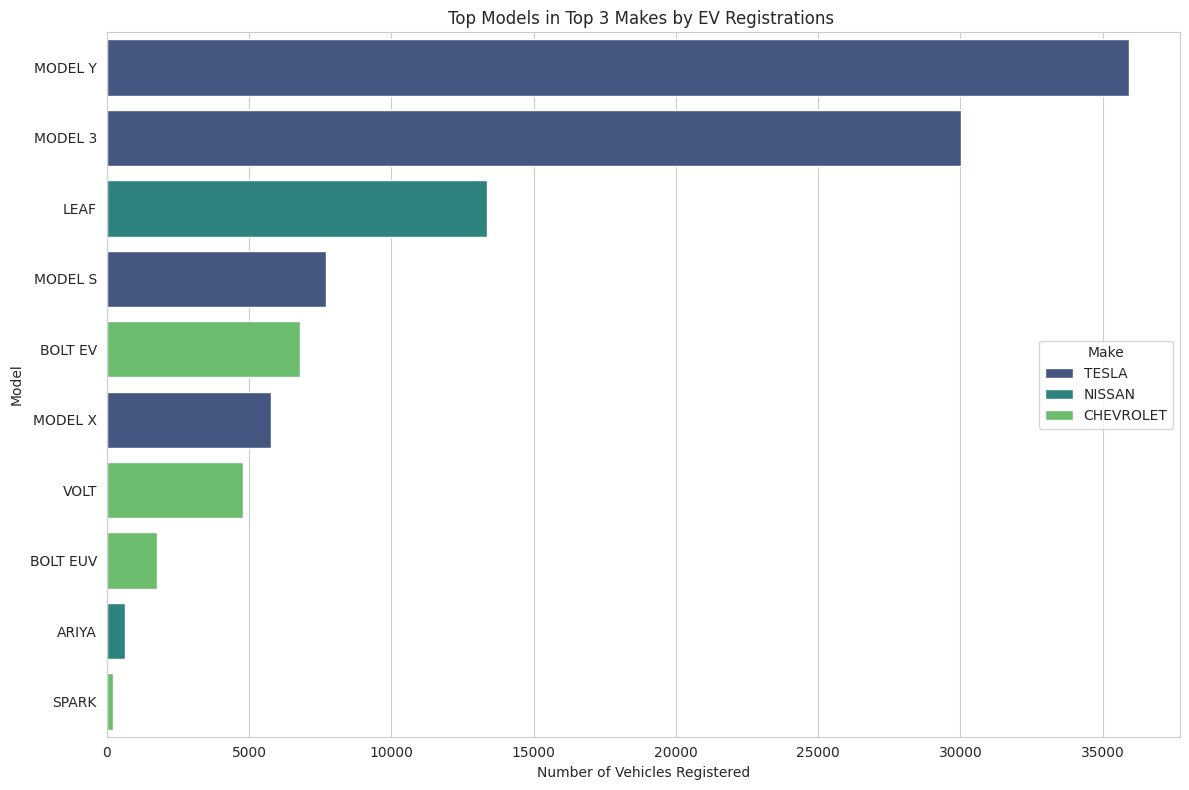

In [ ]:
top_3_makes = ev_make_distribution.head(3).index

top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending = False).reset_index(name='Number of Vehicles')
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize = (12,8))
sns.barplot(x='Number of Vehicles' , y = "Model" , hue ='Make',data =top_models , palette = "viridis")
plt.title("Top Models in Top 3 Makes by EV Registrations ")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Model")
plt.legend(title = 'Make' , loc = 'center right')
plt.tight_layout()
plt.show()


The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET.

TESLA's Model Y and Model 3 are most registered vehicles with Model Y having the highest numbe rof registrations.

NISSAN's LEAF is the third most registered model and the most registered non-TESLA vehicle.

CHEVROLET's BOLT EV and VOLT are next in ranking with considerable registrations.

NISSAN's ARYA and CHEVROLET's SPARK have least number of registrations.

Thus TESLA is dominating EV market.

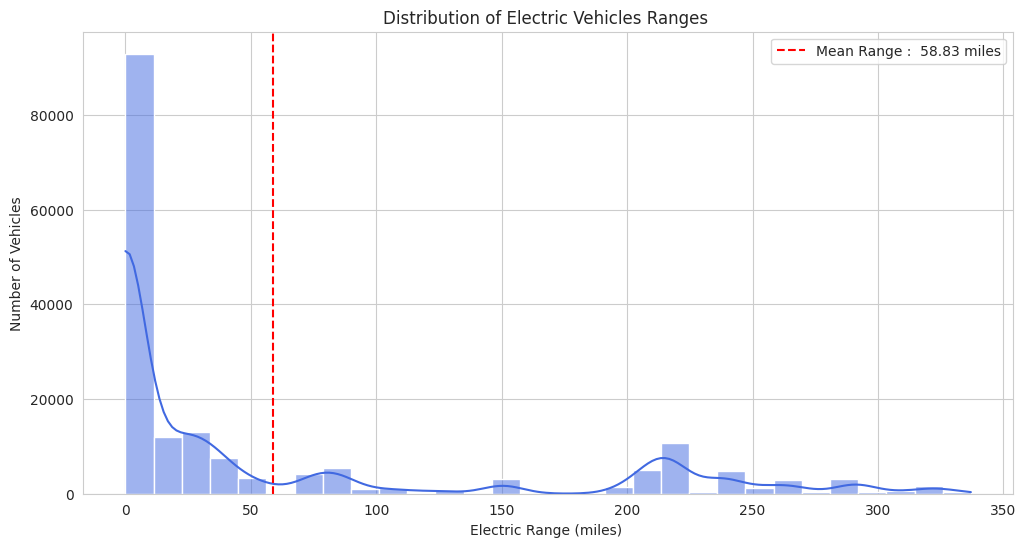

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'] , bins = 30 , kde = True ,  color = 'royalblue')
plt.title("Distribution of Electric Vehicles Ranges ")
plt.xlabel("Electric Range (miles) ")
plt.ylabel("Number of Vehicles")
plt.axvline(ev_data['Electric Range'].mean() , color = 'red', linestyle = '--' , label = f'Mean Range :  {ev_data["Electric Range"].mean():.2f} miles' )
plt.legend()
plt.show()


There is a high frequency of vehicles with a low electric range with a peak just before 50 miles.
The number of vehicles with higher ranges is much less frequent.
The mean electric range is approximately 58.84 miles which is relatively low compared to highest ranges.
Majority of vehicles have a range below the mean.

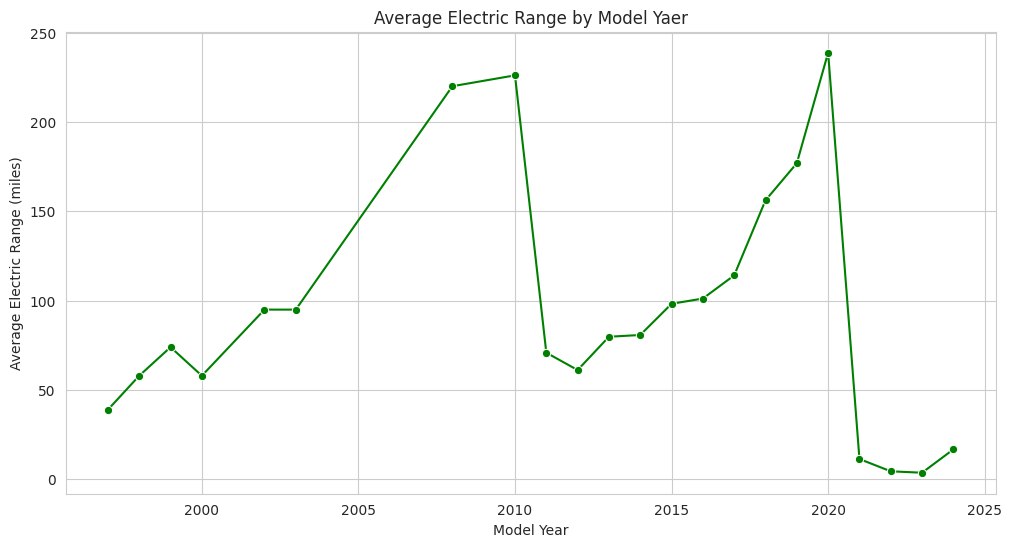

In [ ]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data = average_range_by_year,marker = 'o',color = 'green' )
plt.title('Average Electric Range by Model Yaer')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()


The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024.
There is general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
There is noticable peak around year 2020 when the average range reaches its highest point.
There is a significant drop in average range following 2020 which reflect introduction of several lower-range models.

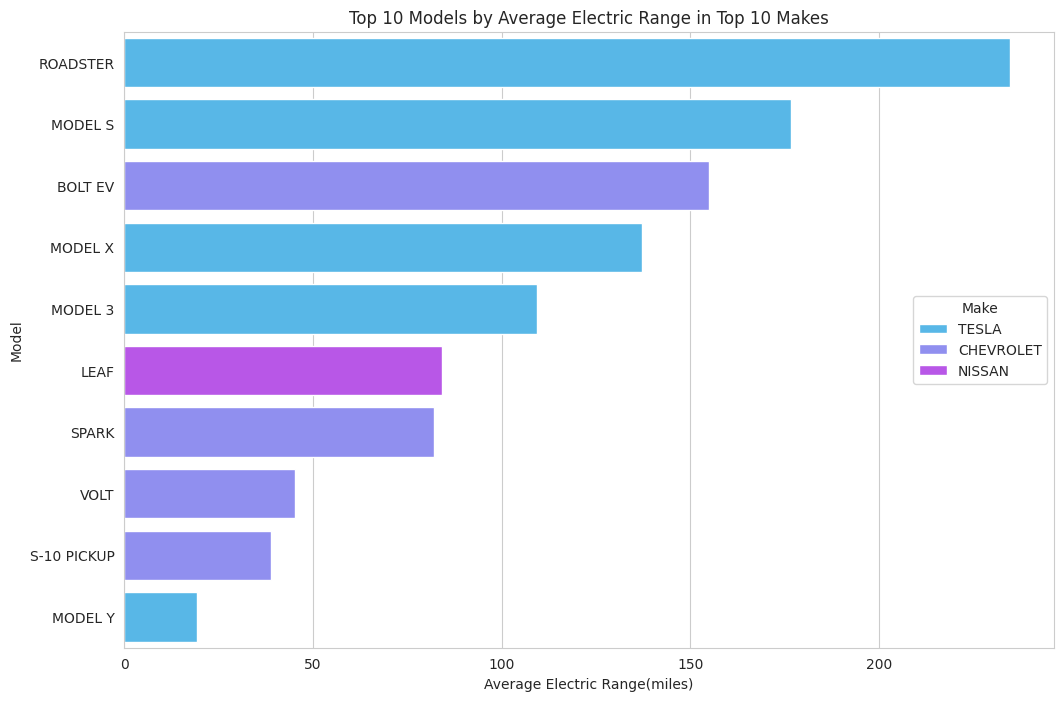

In [ ]:
average_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending= False).reset_index()
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue ='Make',data=top_range_models,palette='cool')
plt.title('Top 10 Models by Average Electric Range in Top 10 Makes')
plt.xlabel('Average Electric Range(miles)')
plt.ylabel('Model')
plt.legend(title ='Make',loc = 'center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed.
TESLA's vehicles have higher electric ranges.
CHEVROLET BOLT EV have higher range than the VOLT and S-10 PICKUP.
NISSAN's LEAF have low electric range as compared to TESLA and CHEVROLET's BOLT EV.

# **Estimated Market Size Analysis of Electric Vehicles in the United States**

In [ ]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March.

In [ ]:
# Forecasting total number of EVs expected to be registered in 2024
from scipy.optimize import curve_fit
import numpy as np
filtered_years = ev_registration_counts[ev_registration_counts.index<=2023]
def exp_growth(x,a,b):
  return a * np.exp(b*x)
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values
params , covariance = curve_fit(exp_growth,x_data,y_data)
forecast_years = np.arange(2024,2024+6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years,*params)
forecasted_evs = dict(zip(forecast_years+filtered_years.index.min(),forecasted_values))
print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


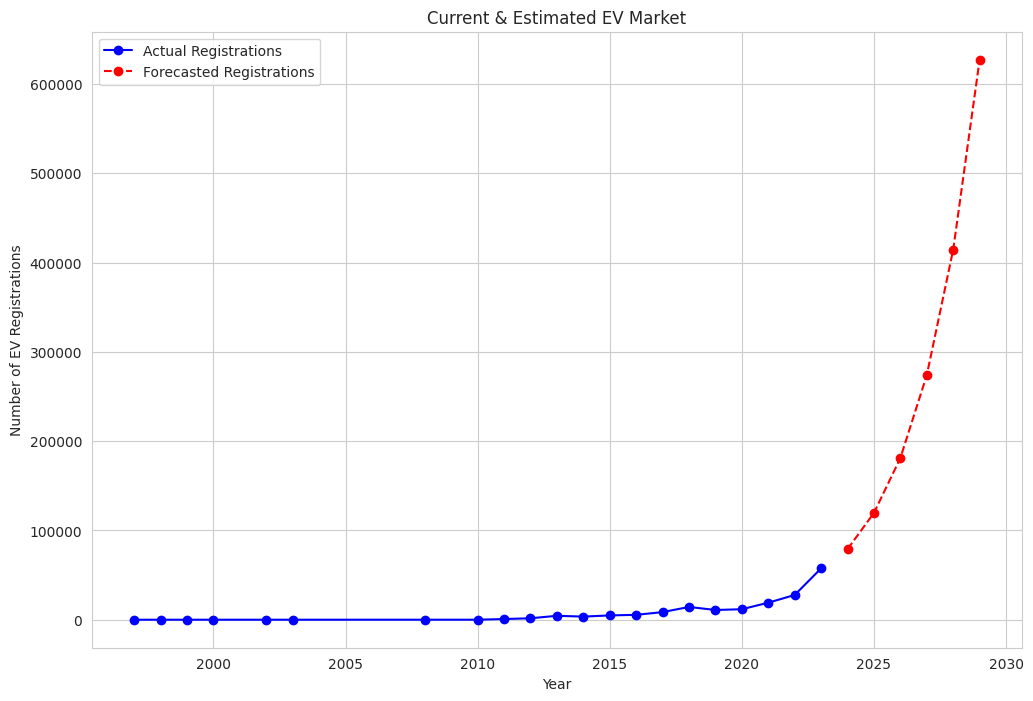

In [ ]:
years = np.arange(filtered_years.index.min(),2029+1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024,2029+1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values, 'bo-',label='Actual Registrations' )
plt.plot(forecast_years_full,forecasted_values_full,'ro--',label ='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()

The forecasted EV registrations predict an even more dramatic increase in the near future.
EV market size is expected to expand considerably.